In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.utils import np_utils
from keras.layers import Dense, Activation, Input
from keras.models import Model

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
# import data
df = pd.read_csv('/Users/savyakshat/Downloads/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# data preprocessing
data = df.values
X = data[:, 1:]
X = X / 255.0
split_factor = 0.8
split = int(split_factor*X.shape[0])
X_train = X[:split, :]
Y_train = X[:split, :]
X_test = X[split:, :]
Y_test = X[split:, :]
print('Shape of X_train: ', X_train.shape)
print('Shape of Y_train: ', Y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of Y_test: ', Y_test.shape)

Shape of X_train:  (33600, 784)
Shape of Y_train:  (33600, 784)
Shape of X_test:  (8400, 784)
Shape of Y_test:  (8400, 784)


In [4]:
# create model
inp = Input(shape = (X.shape[1], ))
h1 = Dense(64)
a1 = Activation('sigmoid')
h2 = Dense(X.shape[1])
a2 = Activation('sigmoid')
out = a2(h2(a1(h1(inp))))
model = Model(inputs = [inp], outputs = [out])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
_________________________________________________________________
activation_2 (Activation)    (None, 784)               0         
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [5]:
# compile the model
model.compile(loss = 'MSE', optimizer = 'adam')

In [6]:
# fit the model
model.fit(X_train, Y_train, batch_size = 16, epochs = 20, validation_data = [X_test, Y_test])

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 4s 116us/step - loss: 0.0567 - val_loss: 0.0387
Epoch 2/20
33600/33600 [==============================] - 4s 111us/step - loss: 0.0321 - val_loss: 0.0270
Epoch 3/20
33600/33600 [==============================] - 4s 112us/step - loss: 0.0239 - val_loss: 0.0213
Epoch 4/20
33600/33600 [==============================] - 4s 111us/step - loss: 0.0195 - val_loss: 0.0179
Epoch 5/20
33600/33600 [==============================] - 4s 114us/step - loss: 0.0169 - val_loss: 0.0160
Epoch 6/20
33600/33600 [==============================] - 4s 118us/step - loss: 0.0152 - val_loss: 0.0145
Epoch 7/20
33600/33600 [==============================] - 4s 113us/step - loss: 0.0137 - val_loss: 0.0127
Epoch 8/20
33600/33600 [==============================] - 4s 129us/step - loss: 0.0117 - val_loss: 0.0107
Epoch 9/20
33600/33600 [==============================] - 4s 116us/step - loss: 0.0097 - val_loss: 0.00

In [7]:
# encoder model
enc_inp = Input(shape = (X.shape[1], ))
enc_out = a1(h1(enc_inp))
encoder = Model(inputs = [enc_inp], outputs = [enc_out])
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________


In [8]:
# decoder model
dec_inp = Input(shape = (64, ))
dec_out = a2(h2(dec_inp))
decoder = Model(inputs = [dec_inp], outputs = [dec_out])
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
_________________________________________________________________
activation_2 (Activation)    (None, 784)               0         
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________


In [9]:
# load testing data
test_df = pd.read_csv('/Users/savyakshat/Downloads/test.csv')
test_data = test_df.values
test_data = test_data / 255.0
print('Shape of test_data: ', test_data.shape)

Shape of test_data:  (28000, 784)


In [10]:
# encode testing images
image_encodings = encoder.predict(test_data)
print('Shape of encoded image: ', image_encodings.shape)

Shape of encoded image:  (28000, 64)


In [11]:
# decode testing images
image_decodings = decoder.predict(image_encodings)
print('Shape of decoded image: ', image_decodings.shape)

Shape of decoded image:  (28000, 784)


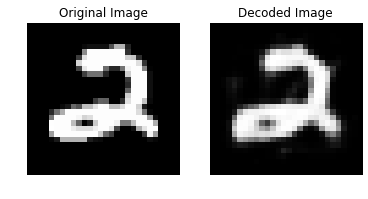

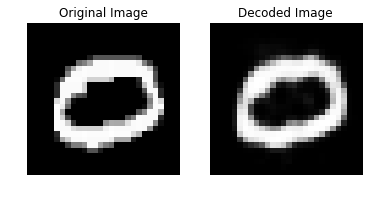

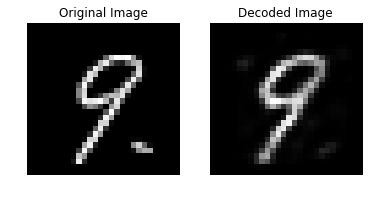

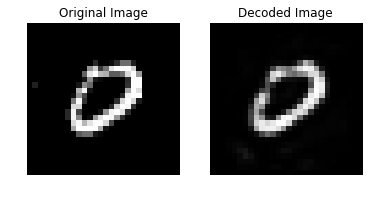

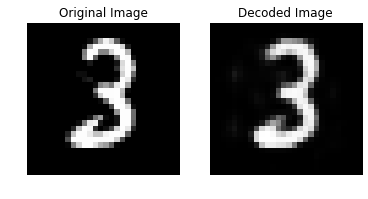

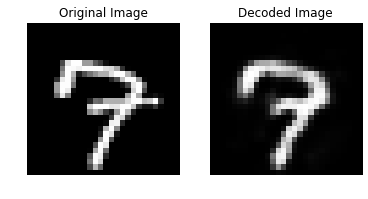

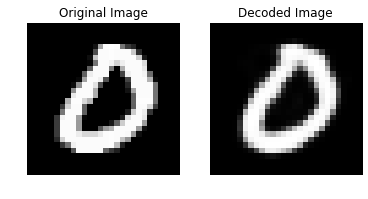

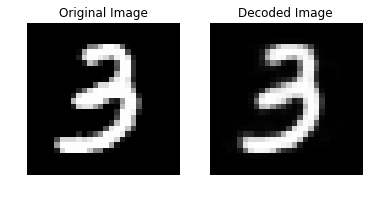

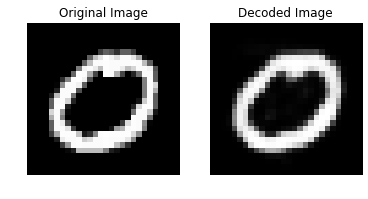

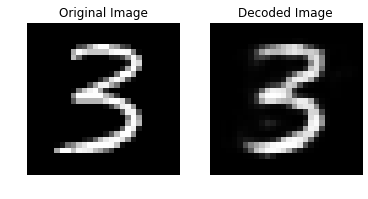

In [12]:
# check decodings
for i in range(10):
    plt.subplot(1, 2, 1)
    plt.imshow(test_data[i].reshape((28, 28)), cmap = 'gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(image_decodings[i].reshape((28, 28)), cmap = 'gray')
    plt.title('Decoded Image')
    plt.axis('off')
    plt.show()